# <center> Quantum computing 0 - 100 </center>
### <center> Dr. Priya J Nadkarni, Xanadu.ai (Independent Contractor) </center>
### <center> Praveen J, IISc UG </center>
### <center> IEEE IISc, Bangalore </center>

<center><img src="./images/iisclogo.jpg" width="240" height="240" align="center"/></center>


Talk abstract: Quantum computers are around the corner and is right now a fast emerging field with various uses from factoring, sorting and other scientific applications. Today, quantum computers and simulators are
accessible by anyone around the world. This tutorial will cover the basic concepts of quantum computing - qubits, quantum gates, the concept of making measurements, preparing bell states, concept of oracles and quantum computing with oracles, Grover’s algorithm and extending it beyond a simple quantum search. We briefly introduce and demonstrate quantum machine learning and demonstrate this through VQE (variational quantum Eigensolvers) that are used to make estimates of energy levels and bond lengths. To conclude the session, we present brief introduction to quantum error correction. All demonstrations and codes will be coded using Qiskit.

# <center> What is quantum computing? </center>
*   Systems in which computing is performed by taking advantage of the laws of quantum physics.
*    These physical systems allow *Superposition* and *Entanglement*
*    Superposition + Entanglement -> Quantum parallelism
* Exploiting quantum parallelism, quantum algorithms efficient compared to known classical algorithms could be designed.

## Quantum stack
<center><img src="./images/q_architecture.png" width="900" height="900" align="center"/></center>
(image from fullstackquantumcomputation.tech)

## <center> Quantum simulators </center>


*   Physical systems like Ion traps, superconducting circuits, Photonic circuits can be used to perform quantum computation.

    *   IBM and Google are developing Superconducting quantum computers
    *   Xanadu is developing photonics quantum computing systems
    *   IonQ, a quantum startup is developing Ion trap based quantum computers
    *   Microsoft is working on topological systems that can be used to perform quantum computation
    

*   Quantum systems are linear, and follow linear algebra and thus can be simulated. Some python based simulators:
    *   Qiskit by IBM provides both simulators and access to actual quantum computing
    *   Cirq by Google quantum
    *   Pennylane + Strawberry fields by Xanadu

We use Pennylane and qiskit for the rest of the presentation

Pennylane installation:

In [ ]:
pip install pennylane

In [ ]:
pip install qiskit

## Devices and experiments:

Device refers to a quantum computer or a simulator that performs the computation.

An experiment refers to performing quantum gates or state evolution, followed by measurements.

In [23]:
import pennylane as qml
from pennylane import numpy as np
dev1 = qml.device("default.qubit", wires=1)

In pennylane, the executable computations are represented as Quantum nodes (Qnodes)

Device + circuit => Qnode


In [24]:
def circuit(parameter):
    qml.RX(parameter, wires=0)
    return qml.expval(qml.PauliZ(0))

circ = qml.QNode(circuit, dev1)
print(circ(np.pi/2))

2.220446049250313e-16


Pennylane is designed to make coding quantum machine learning intuitive. Defining parameterized circuits with qnodes is simple and helps integrating with other packages and workflows.

## Working with qiskit

Qiskit on the other hand is designed to be versatile for various purposes and is 'pythonic'.

In [25]:
#demonstrating superposition

#importing requirements
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

#simulator
qasmsim = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(1, 1)
qc.rx(np.pi/2,qubit = 0)
qc.measure(0, 0)
qc.draw()

┌─────────┐┌─┐
q_0: ┤ RX(π/2) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

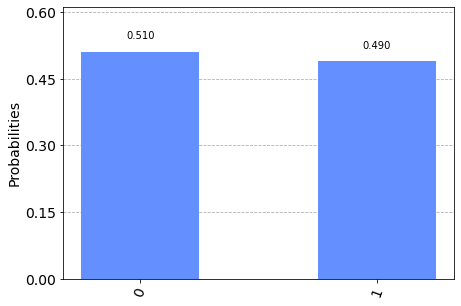

In [27]:
qobj = assemble(qc)
counts = qasmsim.run(qobj, shots = 1000).result().get_counts()
plot_histogram(counts)

# <center> Quantum States and Superposition </center>


*   Classical unit (bit) of information is 0 or 1.
*   A quantum bit (qubit) can be simulatenously 0 and 1.
* Let us represent state 0 by $\vert 0 \rangle$ and 1 by $\vert 1 \rangle$, then the superposition is 
\begin{align}
\vert\psi\rangle = a\vert 0 \rangle + b\vert 1 \rangle,
\end{align}
 where $a$ and $b$ are complex numbers.
* $a$ and $b$ uniquely define the superposition $\Rightarrow$ Two-dimensional complex vector $[a~b] \in \mathbb{C}^2$.
* Measurement affects superposition: Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using the standard basis ($\vert 0 \rangle, \vert 1 \rangle$) gives:

 Measurement outcome $\vert 0 \rangle$ with probability $|a|^2$

 Measurement outcome $\vert 1 \rangle$ with probability $|b|^2$

 * As probabilities add up to 1, $|a|^2+|b|^2=1$ $\Rightarrow$ $[a~b]$ is a normalized vector.

* For n qubits, the superposition is $\underset{i_1, \dots, i_n=0}{\overset{1}{\sum}} a_{i_1\dots i_n}\vert i_1 \rangle\dots \vert i_n \rangle = \underset{i_1, \dots, i_n=0}{\overset{1}{\sum}} a_{i_1\dots i_n}\vert i_1 \dots i_n \rangle$

* For example, for 2 qubits, the basis states are $\vert 00 \rangle$, $\vert 01 \rangle$, $\vert 10 \rangle$, and $\vert 11 \rangle$. Thus,
\begin{align}
\vert\psi\rangle = a_{00}\vert 00 \rangle + a_{01}\vert 01 \rangle + a_{10}\vert 10 \rangle + a_{11}\vert 11 \rangle,
\end{align}
where $[a_{00}~a_{01}~a_{10}~a_{11}]$ is a normalized vector.

In [28]:
#demonstrating superposition

#importing requirements
from pennylane import numpy as np
import sys

def simple_circuit():
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

circ = qml.QNode(simple_circuit, dev1)
print(circ())

0.0


In [29]:
#to obtain probabilities of measurement

def simple_circuit_probs():
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0])

circ2 = qml.QNode(simple_circuit_probs, dev1)
probs1 = circ2()

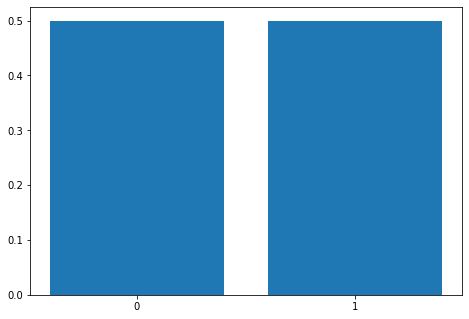

In [30]:
#plotting histogram

import matplotlib.pyplot as plt

int2bin = lambda n, m: bin(n)[2:].zfill(m)

def plot_hist_probs(probs):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    l = len(range(probs.shape[0]))
    m = int(np.log2(l))
    value = [int2bin(i, m) for i in range(l)]
    ax.bar(value,probs)
    plt.show()

plot_hist_probs(probs1)

Almost equal probablity 0.5 of each state 0 and 1 is achieved. Hence equal distribution of +1 and -1, yielding zero expectation value.

In [ ]:
# Implementing a circuit on the IBMq systems
from qiskit import IBMQ, transpile

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

In [ ]:
# provider  -> backend (device) -> Run transpiled circuit

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

# hardware is configured and optimised to certain gates. 
qc_transpiled = transpile(qc, backend=backend)
counts = backend.run(qc_transpiled, shots = 1000).result().get_counts()
plot_histogram(counts)

In [ ]:
backend.configuration().basis_gates

In [ ]:
#from here - Priya

## <center> Quantum Gates </center>

* Quantum dynamics is linear + States are normalized $\Rightarrow$ Quantum operators are unitary ($UU^{\dagger} = U^{\dagger}U = \mathrm{I}$)
* Unitary gates $\Rightarrow$ Reversible computation.
* States: Normalized two-dimensional complex vectors $\Rightarrow$ Operators: Unitary $(2\times 2)$-dimensional complex matrices.
* Unitary gates on superposition: $U(a\vert 0 \rangle+b\vert 1 \rangle) = aU\vert 0 \rangle+bU\vert 1 \rangle$

* A few quantum gates:
    * X gate or Bit flip gate:
      \begin{align}
      \mathrm{X} = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}, \mathrm{X}\vert 0 \rangle = \vert 1 \rangle, \mathrm{X}\vert 1 \rangle = \vert 0 \rangle.
      \end{align}
    * Z gate or Phase flip gate:
      \begin{align}
      \mathrm{Z} = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}, \mathrm{Z}\vert 0 \rangle = \vert 0 \rangle, \mathrm{Z}\vert 1 \rangle = -\vert 1 \rangle.
      \end{align}
    * H gate or Hadamard gate:
  \begin{align}
  \mathrm{H} = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}, \mathrm{H}\vert 0 \rangle = \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}} := \vert + \rangle, \mathrm{H}\vert 1 \rangle = \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}} := \vert - \rangle.
  \end{align}

Notice that $HZH = X$ and eigen states of $Z$ are $\vert 0\rangle$, $\vert 1 \rangle$, while eigen states of $X$ are $\vert +\rangle$, $\vert - \rangle$.

### Few other gates

* S gate or Phase gate:
  \begin{align}
  \mathrm{S} = \begin{bmatrix}1 & 0\\0 & \mathrm{i}\end{bmatrix}, \mathrm{S}\vert 0 \rangle = \vert 0 \rangle, \mathrm{S}\vert 1 \rangle = \mathrm{i}\vert 1 \rangle.
  \end{align}
      

* CNOT gate or Controlled-NOT gate: (2 qubit gate)
  \begin{align}
  \mathrm{CNOT} &= \begin{bmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{bmatrix}, \\
  \mathrm{CNOT}\vert 00 \rangle = \vert 00 \rangle, &\mathrm{CNOT}\vert 01 \rangle = \vert 01 \rangle, \mathrm{CNOT}\vert 10 \rangle = \vert 11 \rangle, \mathrm{CNOT}\vert 11 \rangle = \vert 10 \rangle.
  \end{align}

  Controlled-NOT because the NOT operation, i.e., the X operation, is performed on 2nd qubit only when 1st qubit is $\vert 1\rangle$, else, no operation is performed. 
* Universal set of gates: All one qubit gates + CNOT.

## <center> Pauli Basis </center>

* Pauli basis is a unitary basis of the complex space of matrices:
\begin{align}
\text{Pauli Basis =} \left\{ \mathrm{I} = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}, \mathrm{X} = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}, \mathrm{Z} = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}, \mathrm{Y} = \begin{bmatrix}0 & -\mathrm{i}\\\mathrm{i} & 0\end{bmatrix} = \mathrm{iXZ}\right\}.
\end{align}
* All quantum operators can be represented in terms of the Pauli basis.
* Pauli Group:
\begin{align}
\mathcal{P} = \left\{ \pm \mathrm{I}, \pm \mathrm{iI}, \pm \mathrm{X}, \pm \mathrm{iX}, \pm \mathrm{Y}, \pm \mathrm{iY}, \pm \mathrm{Z}, \pm \mathrm{iZ} \right\}.
\end{align}

### Measurement

* We had measured in the $\vert 0 \rangle$, $\vert 1 \rangle$ basis. In general, we can choose to measure in any (orthogonal) basis states and we would obtain different final results.
  * Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using the standard basis ($\vert 0 \rangle, \vert 1 \rangle$) gives:
    
      Measurement outcome $\vert 0 \rangle$ with probability $|a|^2$

      Measurement outcome $\vert 1 \rangle$ with probability $|b|^2$

  * Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using $\vert + \rangle, \vert - \rangle$ basis gives:

     Measurement outcome $\vert + \rangle$ with probability $|\frac{a + b}{\sqrt{2}}|^2$

     Measurement outcome $\vert - \rangle$ with probability $|\frac{a - b}{\sqrt{2}}|^2$

* Measurement based on an observable:
  * Quantum Mechanics Postulate: Every measurement is associated with an observable $O$ and the values observed are the eigenvalues of the observable $O$.
  \begin{align}
  O\vert \psi\rangle = e\vert \psi\rangle , \text{ where }e\text{ is the eigenvalue of $O$ observed.}
  \end{align}
  * As only real values can be observed $\Rightarrow$ Observables are Hermitian.
  * Measurement basis in terms of observable:
    * Measuring the Pauli-Z operator:
        * Eigenbasis of Pauli-Z has $\vert 0\rangle$ (Eigenvalue =1) and $\vert 1\rangle$(Eigenvalue =-1).
        \begin{align}
          \mathrm{Z}\vert 0\rangle = \vert 0\rangle, \mathrm{Z}\vert 1\rangle = -\vert 1\rangle
        \end{align}
    * Measuring the Pauli-X operator:
       * Eigenbasis of Pauli-X has $\vert +\rangle$ (Eigenvalue =1) and $\vert -\rangle$(Eigenvalue =-1).
        \begin{align}
          \mathrm{X}\vert +\rangle = \vert +\rangle, \mathrm{X}\vert -\rangle = -\vert -\rangle
        \end{align}

## <center> Bloch Sphere </center>

* A qubit: $\vert \psi \rangle = a \vert 0\rangle + b\vert 1 \rangle$.

  As $|a|^2 + |b|^2 = 1$, let $a = |a| e^{i\phi_0}$ and $b = |b| e^{i\phi_1}$, then

\begin{align}
\vert \psi \rangle &= a \vert 0\rangle + b\vert 1 \rangle = |a| e^{i\phi_0}\vert 0\rangle + |b| e^{i\phi_1} \vert 1 \rangle\\
\vert \psi \rangle &= e^{i\phi_0}(|a| \vert 0\rangle + |b| e^{i(\phi_1-\phi_0)} \vert 1 \rangle)\\
\vert \psi \rangle &= e^{i\phi_0}(\mathrm{cos}~ \theta \vert 0\rangle + \mathrm{sin} ~\theta e^{i\phi} \vert 1 \rangle),
\end{align}
where $\phi = \phi_0-\phi_1$, $|a|=\mathrm{cos}~ \theta$, and $|b|=\mathrm{sin}~ \theta$.

* Bloch sphere: A sphere with spherical coordinates $[1,\theta,\phi]$ (Radius is 1 as the state is normalized).
* Pure states: On the surface of the Bloch sphere
* Mixed states: Inside the bloch sphere

<img src="./images/Bloch_sphere.png" width="400" height="400" align="center"/>

/home/praveen/anaconda3/lib/python3.7/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


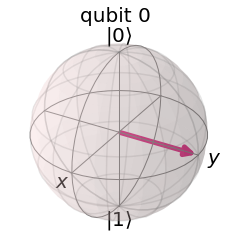

In [31]:
# bloch sphere representation demonstration
from numpy import pi
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

%matplotlib inline

statesim = Aer.get_backend('statevector_simulator')

q = QuantumCircuit(1)
q.u3(pi/2, pi/2, 0, 0)

state = Statevector.from_instruction(q)
plot_bloch_multivector(state)

## <center> Entanglement </center>

* Two states are entangled when the state of one qubit cannot be described independently of the other.
* Entanglement $\Rightarrow$ Correlation between particle irrespective of the distance between them
* Entanglement cannot be created locally. 
* Example: Bell state: $(\vert 00\rangle + \vert 11\rangle)/\sqrt{2}$. 


In [32]:
# bell state
dev2 = qml.device("default.qubit", wires=2)

def bell_state():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

circ_bell = qml.QNode(bell_state, dev2)
probs2 = circ_bell()
    
drawer = qml.draw(circ_bell)
print(drawer())

 0: ──H──╭C──╭┤ Probs 
 1: ─────╰X──╰┤ Probs 



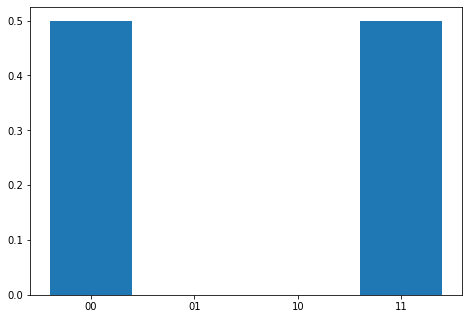

In [33]:
plot_hist_probs(probs2)

* Applications: 
   * Quantum teleportation: Transfer information in one qubit using one Bell pair and transmitting two classical bits over a classical channel.
   * Super dense coding: Transfer two classical bits using one Bell pair where one qubit of the Bell pair is transmitted over the quantum channel.
   * Quantum error correction: Due to No cloning theorem, quantum information cannot be copied. Store quantum information redundantly using entanglement making error correction possible. 
* Mixed state: Ensemble representation of a qubit in an entangled state:

<center> First qubit of Bell state: $\rho = \{(0.5,\vert 0\rangle), (0.5,\vert 1\rangle)\}$.<center>

## <center> Types of Communication </center>

  \begin{array}{|c|c|c|c|}\hline\\ 
  \text{Information} & \text{States transmitted} & \text{Channel} & \text{Example} \\ \hline\\
  \text{Classical} & \text{Classical} & \text{Classical} & \text{Classical Communication}\\ \hline\\ 
  \text{Quantum} & \text{Quantum }  & \text{Quantum} & \text{Quantum Communication}\\ \hline\\ 
    \text{Classical} & \text{Quantum} (\text{Basis states}) & \text{Quantum} & \text{Quantum Key Distribution}\\ \hline \\
        \text{Quantum} & \text{Classical } (\text{with Bell pairs}) & \text{Classical} & \text{Quantum Teleportation}\\ \hline \\
        \text{Classical} & \text{Quantum } (\text{with Bell pairs})  & \text{Quantum} & \text{Super Dense Coding}\\ \hline
  \end{array}


## <center> Quantum Teleportation </center>

* Transfering quantum information from one place to another without using any quantum channel between them.
* We will be using the following:
  * Transmission of two classical bits over the classical channel
  * Pre-shared Bell Pair between the transmitter and the receiver.
  * Local quantum gates (H, X, Z, and CNOT)
* Bell Basis:
  \begin{align}
    \vert \phi^+\rangle = \frac{\vert 00\rangle + \vert 11\rangle}{\sqrt{2}},~
    \vert \phi^-\rangle = \frac{\vert 00\rangle - \vert 11\rangle}{\sqrt{2}},~
    \vert \psi^+\rangle = \frac{\vert 01\rangle + \vert 10\rangle}{\sqrt{2}},~
    \vert \psi^-\rangle = \frac{\vert 01\rangle - \vert 10\rangle}{\sqrt{2}}\\
  \end{align}
  Commonly used Bell Pair (also called EPR Pair) is $\vert \phi^+\rangle$.
  Bell basis is an orthonormal basis.
* Protocol is important: For a quantum state $\vert \psi\rangle = a\vert 0\rangle + b\vert 1\rangle$, $a,b \in \mathbb{C}$:
  * a,b are usually not known
  * If can be known, to accurately transmit information about a and b using bits - might need infinite transmission.



## <center> Quantum Teleportation Protocol</center>

![](./images/T1.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T2.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T3.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T4.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T5.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T6.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T7.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T8.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T9.png)

## <center> Quantum Teleportation Protocol</center>

![](./images/T10.png)

In [ ]:
# quantum teleportation implementation

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize


psi = [1/np.sqrt(2),1/np.sqrt(2)] 


QT = QuantumRegister(3, name="q")    # Defining the 3 qubits
M1 = ClassicalRegister(1, name="m1") # Defining 2 classical bits to store the measurement results
M2 = ClassicalRegister(1, name="m2")
QT_circuit = QuantumCircuit(QT, M1, M2)



#Create a Bell pair between qubits 2 and 3
QT_circuit.h(1)
QT_circuit.cx(1,2)

QT_circuit.barrier() # Using a barrier to show that the Bell pair was created long before the teleportation

In [ ]:
# To initialize the first qubit to a |+> state
QT_circuit.h(0)
QT_circuit.barrier()

#Apply the CNOT and H gates on the transmitter end
QT_circuit.cx(0,1)
QT_circuit.h(0)

# Measure the two transmitter end qubits

QT_circuit.measure(0,0)
QT_circuit.measure(1,1)

In [ ]:
# Based on the measurement outcomes, Bob applies the X and Z gates

QT_circuit.x(2).c_if(M2, 1)
QT_circuit.z(2).c_if(M1, 1)

#Draw the teleportation circuit
QT_circuit.draw()

#Run a quantum simulation for teleportation
sim = Aer.get_backend('aer_simulator')
QT_circuit.save_statevector()
out_vector = sim.run(QT_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

In [34]:
QT_circuit.draw()

░ ┌───┐ ░      ┌───┐┌─┐               ░ 
 q_0: ───────────░─┤ H ├─░───■──┤ H ├┤M├───────────────░─
      ┌───┐      ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘               ░ 
 q_1: ┤ H ├──■───░───────░─┤ X ├─┤M├──╫────────────────░─
      └───┘┌─┴─┐ ░       ░ └───┘ └╥┘  ║  ┌───┐  ┌───┐  ░ 
 q_2: ─────┤ X ├─░───────░────────╫───╫──┤ X ├──┤ Z ├──░─
           └───┘ ░       ░        ║   ║  └─╥─┘  └─╥─┘  ░ 
                                  ║   ║    ║   ┌──╨──┐   
m1: 1/════════════════════════════╬═══╩════╬═══╡ = 1 ╞═══
                                  ║   0 ┌──╨──┐└─────┘   
m2: 1/════════════════════════════╩═════╡ = 1 ╞══════════
                                  0     └─────┘

  ## <center> Quantum Teleportation: Few comments</center>

  * Communication is not faster than speed of light as classical communication is required to teleport the state to the other end.
  * No violation of no-cloning theorem: The receiver end obtains the quantum information when the transmitter end state is measured.
  * Gate-teleportation: Quantum gates applied to quantum states via teleportation -> Leads to Teleportation based quantum computation.

## <center> Super Dense Coding </center>

* Transmission of two classical bits with one qubit and without any classical channel.
* We will be using the following:
  * Transmission of one quantum bit over the quantum channel
  * Pre-shared Bell Pair between the transmitter and the receiver.
  * Local quantum gates (H, X, Z, and CNOT)
* Caveat: As we are considering a pre-shared Bell pair, one qubit has been transmitted over the quantum channel in the past.


<img src="./images/S1.png" width="1080" height="1920" align="center"/>

<img src="./images/S2.png" width="1080" height="1920" align="center"/>

<img src="./images/S3.png" width="1080" height="1920" align="center"/>

<img src="./images/S4.png" width="1080" height="1920" align="center"/>

<img src="./images/S5.png" width="1080" height="1920" align="center"/>

## <center> Super Dense Coding </center>

* Secure Classical Communication:
  * Each Bell pair is a maximally entangled state:
    \begin{align}
      \text{Mixed state of transmitted qubit }= \{(0.5,\vert 0\rangle),(0.5,\vert 1\rangle)\}
    \end{align}
  * Impossible for eavesdropper to deduce the quantum state transmitted. 

In [35]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
SDC_Circuit = QuantumCircuit(2)

# Create a Bell pair between the 2 qubits by applying a H gate on the 1st qubit followed by CNOT across the 2 qubits (1st as control)
SDC_Circuit.h(0) 
SDC_Circuit.cx(0,1)

# Adding a barrier as the Bell pair would be created much before SDC
SDC_Circuit.barrier() 

# Assign the classical information to bits
b1 = "0"
b2 = "1"

if b1 == "1":
    SDC_Circuit.x(0)

if b2 == "1":
    SDC_Circuit.z(0)

# Adding a barrier to distinguish from the receiver circuit
SDC_Circuit.barrier()

SDC_Circuit.draw()

┌───┐      ░ ┌───┐ ░ 
q_0: ┤ H ├──■───░─┤ Z ├─░─
     └───┘┌─┴─┐ ░ └───┘ ░ 
q_1: ─────┤ X ├─░───────░─
          └───┘ ░       ░

{'01': 1024}


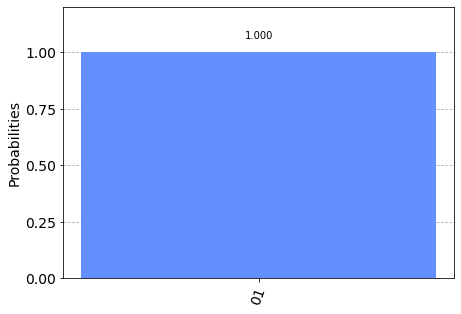

In [36]:
# The transmitter qubit is sent to the receiver.

# The receiver applies the recovery protocol

SDC_Circuit.cx(0,1)
SDC_Circuit.h(0)

# Finally, Bob measures his qubits to read Alice's message
SDC_Circuit.measure_all()

# Draw our output
SDC_Circuit.draw()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(SDC_Circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts(SDC_Circuit)
print(counts)
plot_histogram(counts)

In [37]:
# Draw our output
SDC_Circuit.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [ ]:
# from here - Praveen

## <center> Quantum Key Distribution </center>
Goal: To establish a shared binary string between two parties - Alice and Bob, while protecting information from evesdropper Eve

Idea: When state $\vert +\rangle$ (or) $\vert - \rangle$ is measured in standard basis $\vert 0 \rangle, \vert 1 \rangle$, we obtain 0 and 1 with equal probability, and vice versa
![](./images/x1.jpeg)
QKD set up, image source:  https://deepai.org/publication/backflash-light-as-a-security-vulnerability-in-quantum-key-distribution-systems

Protocol:
* Alice has to transmit bit string $\bar{a} = a_1a_2\cdots a_n$. She chooses another bit string $\bar{b} = b_1b_2\cdots b_n$ to denote the basis with which she encodes her bit string into qubits $\vert \bar{q}\rangle = \vert q_1q_2\cdots q_n\rangle$.
    * If $b_i = 0$, she encodes with $\{\vert 0 \rangle, \vert 1 \rangle\}$ basis: 

        $a_i = 0 \rightarrow \vert q_i \rangle = \vert 0 \rangle$, 

        $a_i = 1 \rightarrow \vert q_i \rangle = \vert 1 \rangle$

    * If $b_i = 1$, she encodes with $\{\vert + \rangle, \vert - \rangle\}$ basis: 

        $a_i = 0 \rightarrow \vert q_i \rangle = \vert + \rangle$, 

        $a_i = 1 \rightarrow \vert q_i \rangle = \vert - \rangle$

* Alice now sends qubits $\vert q_1q_2\cdots q_n \rangle$ to Bob, without revealing basis string $\bar{b} = b_1b_2\cdots b_n$.
* Bob does not know the basis of state preparation $\bar{b}$ and randomly chooses bit string $\bar{c} = c_1c_2\cdots c_n$ that determine the basis of measurement
    * If $c_i = 0$, he measures in $\{\vert 0 \rangle, \vert 1 \rangle\}$ basis: 

        If $b_i = 0$, Bob obtains correct answer $d_i = a_i$ with probability ~ 1

        If $b_i = 1$, Bob obtains correct answer $d_i = a_i$ and wrong answer $d_i \neq a_i$ with probability ~ 0.5 each

    * If $c_i = 1$, he measures in $\{\vert + \rangle, \vert - \rangle\}$ basis: 

        If $b_i = 1$, Bob obtains correct answer $d_i = a_i$ with probability ~ 1

        If $b_i = 0$, Bob obtains correct answer $d_i = a_i$ and wrong answer $d_i \neq a_i$ with probability ~ 0.5 each


<img src="./images/QKD.png" width="800" height="800" align="center"/>

* Finally, Bob tells Alice that he has performed measurements. Alice and Bob publicly exchange basis strings $\bar{b}$ and $\bar{c}$.
* In both above cases, if $b_i = c_i$ (they choose the same basis), measurement is performed in the same basis and answers will almost always be correct, an for basis mismatch, would be wrong for half the bits.
* Hence they retain the bit results $a_i$ and $d_i$ respectively at positions where they used the same basis bits $b_i = c_i$.

Advantange: Information is physically protected from evesdropping and third parties. Eve does not know the basis used by Alice. If Eve tries to obtain information by performing measurements, Bob would receive altered qubits with too many errors and this can be detected by statistical methods. This can be performed by using a small fraction of the obtained bit strings $\bar{a}$ and $\bar{d}$ to verify integrity.

![](./images/qkd.png)

## <center> Searching </center>
 * Classically, to find an object in an unsorted list, it requires us to check every item of the list. If the number of elements is n, it requires at max n checks to find an element. Complexity of search: $\mathcal{O}(n)$

 * Using Grover's search algorithm on an unsorted database, one can find an object with just $\mathcal{O}(\sqrt{n})$ checks.

 * The Grover's search algorithm consists of 2 steps:
     * Oracle creation
     * Amplitude amplification
 

* Oracle creation: 
  * Classical function: $f_w(x) = 0$ if $x\neq w$ and $f_w(x) = 1$ if $x=w$.
  * Quantum function: 
  \begin{align}
  \vert x \rangle &\vert y \rangle \xrightarrow{U_w} \vert x \rangle \vert y \oplus f_w(x) \rangle,\\
   \text{which is }\text{equivalent to}\\
   \vert x \rangle  &\rightarrow{U_w}(-1)^{f_w(x)}\vert x \rangle,\text{ when }\vert y \rangle = (\vert 0 \rangle - \vert 1 \rangle)/\sqrt{2}, \\
  \Rightarrow U_w &= \mathrm{I} - 2\vert w \rangle \langle w\vert
      \end{align}
     Thus, the oracle flips sign of state $\vert w\rangle$ but does not change the other states.

<img src="./images/grover_step1.jpg" width="1080" height="1920" align="center"/>
(Image from qiskit textbook)

<img src="./images/grover_step2.jpg" width="1080" height="1920" align="center"/>
(Image from qiskit textbook)

* Amplitude Amplification: 
  * First prepare a equiprobable normalized superposition of all possible values of $x$ (Hadamard gates $\mathrm{H}$ on $\vert 0\rangle$s):
\begin{align}
\vert s \rangle  = \frac{1}{\sqrt{n}}\underset{x=1}{\overset{n}{\sum}}\vert x \rangle.
\end{align}
 * We next perform the Grover's interations: Grover iteration comprises of 2 steps:
     *  Apply the operator $U_w = \mathrm{I} - 2\vert w \rangle \langle w\vert$ to the state $\vert \psi \rangle$. For the first iteration, $\vert \psi \rangle = \vert s \rangle$.
     * Apply the operator $U_s = 2\vert s \rangle\langle s \vert - \mathrm{I}$ which preserves $s$ but flips sign of states orthogonal to $\vert s\rangle$.

     Let $\vert \psi\rangle = \underset{x=1}{\overset{n}{\sum}}a_x\vert x\rangle$. Then, $U_s \vert \psi\rangle = \underset{x=1}{\overset{n}{\sum}} (2\langle a \rangle-a_x)\vert x \rangle$. 
\begin{align}
  \text{Let }a_x = \langle a \rangle + a_d \Rightarrow (2\langle a \rangle - a_x) = \langle a \rangle - a_d
\end{align}
Thus, the amplitudes are inverted along the mean amplitude.
* After the Grover's iteration is applied for $\sqrt{n}$ times, the amplitudes $a_x = 0$ for  $x \neq w$ and $a_w=1$.

<img src="./images/grover_step3.jpg" width="1080" height="1920" align="center"/>
(Image from qiskit textbook)

<img src="./images/GroverAlgo.png" width="1080" height="1920" align="center"/>

We can numerically determine the number of Grover's iterations required and we obtain it as $\sqrt{n}$

In [ ]:
#grover's algorithm (oracle identifies string s) 2 bit string

grovers = QuantumCircuit(2, 2)

#creating equal superposition
grovers.h([0, 1])
#grovers.draw()

In [38]:
from pennylane import broadcast

def grovers():
    broadcast(unitary=qml.Hadamard, pattern="single", wires=[0,1])
    
    #oracle
    s = '10'
    for i in range(len(s)):
        if s[i] == '0':
            qml.PauliX(wires= i)
    qml.CZ(wires = [0, 1])
    for i in range(len(s)):
        if s[i] == '0':
            qml.PauliX(wires= i)
    
    # amplification
    broadcast(unitary=qml.Hadamard, pattern="single", wires=[0,1])
    qml.PauliZ(wires = 0)
    qml.PauliZ(wires = 1)
    qml.CZ(wires = [0, 1])
    broadcast(unitary=qml.Hadamard, pattern="single", wires=[0,1])
    
    return qml.probs(wires = [0, 1])

In [39]:
dev2 = qml.device("default.qubit", wires=2)
circ_grovers = qml.QNode(grovers, dev2)
probs_grovers = circ_grovers()

drawer = qml.draw(circ_grovers)
print(drawer())

 0: ──H─────╭C──H──Z─────╭C──H──╭┤ Probs 
 1: ──H──X──╰Z──X──H──Z──╰Z──H──╰┤ Probs 



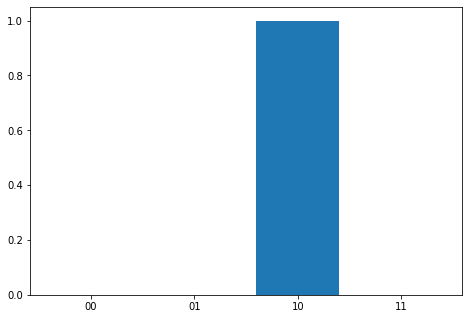

In [40]:
plot_hist_probs(probs_grovers)

In [ ]:
#applying oracle to mark string s
s = '10'
for i in range(len(s)):
    if s[i] == '0':
        grovers.x(i)
grovers.cz(0, 1)
for i in range(len(s)):
    if s[i] == '0':
        grovers.x(i)

In [ ]:
#amplitude amplification (I - |S>)
grovers.h([0, 1])
grovers.z([0, 1])
grovers.cz(0, 1)
grovers.h([0, 1])

grovers.draw()

In [ ]:
grovers.measure([0, 1], [0, 1])
qobj = assemble(grovers)
counts_grovers = qasmsim.run(qobj).result().get_counts()
plot_histogram(counts_grovers)

## <center> Oracles </center>
In the algorithm above, we used an oracle to mark the required state. An oracle can be thought of as a blackbox that given an input, spits out the corresponding answer.
oracles can be designed for tasks like 
* Determining if the given input is the required target, 
* For calculating some hidden function $f$ on the input. 
* It can also be used to mark if the given input satisfies some criteria ie verify if it is a solution, satisfiability problem. grover's algorithm can be used to solve NP complete problems.

NP problems are those who's solutions are hard to find but easy to verify. Thus when given a superposition of all posible solution states, the quantum oracle marks the solution state. In the next step, the amplitude of the marked state will be amplified.

The example illustrated where we marked string 01, the problem can be recast into a clause $(\bar{x_1}\wedge x_2)$

In general we can solve the 3 satisfiability (3-SAT) problem by recasting the string into maximally disjoint clauses of the form
$(x_1 \vee x_2 \vee x_3)\wedge(x_4\vee x_5 \vee x_6)\wedge \cdots $



## <center> VQE and optimization using quantum computers </center>

* In chemistry and biology, we require to estimate and predict various parameters of molecules to study and understand their properties.
* Estimating these properties using classical computers and algorithms are computationally hard. Quantum systems have entanglement and superposition that are hard to efficiently simulate on classical systems.
* As Prof. Feynman had once said, quantum computer would be better to efficiently simulate quantum systems.  
* An important parameter that determines the stability and various properties is the bond length of the molecule.


* The bond length by definition minimizes the energy of the molecule. This hints at designing a quantum optimizer parameterized by the bond length and outputs the estimated energy.
* We can then optimize the circuit (by optimizing parameters like bond length) to obtain the least energy possible.

### Other applications

* Matrix inversion by HHL method - to solve linear equations efficiently
    Uses phase estimation and conditional rotational gates to approximately invert matrices
* Optimization using QAOA - Start with a known hamiltonian $H_0$ and the lowest eigen state and quasi-statically evolve to the required hamiltonian $H_1$. Due to Adiabaticity, the final state of the system would also be the lowest eigen state of $H_1$.
* Shor's factoring algorithm - To solve discrete logarithm problem using phase estimation- Can solve with exponential speed up over classical methods and break RSA encryption.

In [ ]:
# from here - Priya

## <center> Quantum Error Correction</center>
* Quantum Errors:
  * Quantum Decoherence: Quantum system interacts with the environment, gets entangled, and becomes a mixed state (Loss of quantum information).
  * Quantum errors due to imperfect quantum gates and other quantum hardware.

* Quantum Error Correction Idea (Similar to classical error correction):
  * Message encoded in a higher dimensional space (Adding redundancy). 
  * When errors occur, quantum information is retrieved with the help of the redundant quantum information.
  * There is a notion of distance or set of correctable errors.

* Initially it was assumed that quantum error correction was not possible due to
  * No-cloning theorem.
  * Measurement destroys superposition.
  * Continuous nature of quantum errors.

![](./images/ECC1.png)

## <center> Shor's code (First Quantum Error Correction Codes (QECCs))</center>

  * Classical repetition code: Correct one bit flip error
  \begin{align}
    0 \rightarrow 000, 1 \rightarrow 111.
  \end{align}
  * Quantum single bit flip correcting code:
    \begin{align}
      \vert 0\rangle \rightarrow \vert 000\rangle, \vert 1\rangle \rightarrow \vert 111\rangle. 
    \end{align}
  * Quantum single phase flip correcting code: ($\mathrm{Z}\vert + \rangle = \vert - \rangle$)
    \begin{align}
      \vert 0\rangle \rightarrow \vert +++\rangle, \vert 1\rangle \rightarrow \vert ---\rangle. 
    \end{align}
  * Syndrome computation: Take 2 ancilla qubit and perform CNOT(1,4)CNOT(2,4) and CNOT(2,5)CNOT(3,5) to get the syndrome for bit flip error. Similar for phase flip error but Hadamard gate should be used.

  * Shor's code: Obtained by concatenating the two codes: 
    * First use the phase flip code
  \begin{align}
   \vert 0\rangle \rightarrow \left(\frac{\vert 0\rangle+\vert 1\rangle}{\sqrt{2}}\right)\left(\frac{\vert 0\rangle+\vert 1\rangle}{\sqrt{2}}\right)\left(\frac{\vert 0\rangle+\vert 1\rangle}{\sqrt{2}}\right),\\
   \vert 1\rangle \rightarrow \left(\frac{\vert 0\rangle-\vert 1\rangle}{\sqrt{2}}\right)\left(\frac{\vert 0\rangle-\vert 1\rangle}{\sqrt{2}}\right)\left(\frac{\vert 0\rangle-\vert 1\rangle}{\sqrt{2}}\right),\\
  \end{align}
    * Then apply the bit flip code
\begin{align}
   \vert 0\rangle \rightarrow \left(\frac{\vert 000\rangle+\vert 111\rangle}{\sqrt{2}}\right)\left(\frac{\vert 000\rangle+\vert 111\rangle}{\sqrt{2}}\right)\left(\frac{\vert 000\rangle+\vert 111\rangle}{\sqrt{2}}\right),\\
   \vert 1\rangle \rightarrow \left(\frac{\vert 000\rangle-\vert 111\rangle}{\sqrt{2}}\right)\left(\frac{\vert 000\rangle-\vert 111\rangle}{\sqrt{2}}\right)\left(\frac{\vert 000\rangle-\vert 111\rangle}{\sqrt{2}}\right),\\
  \end{align}

## <center> Stabilizer Codes (QECCs)</center>

* Daniel Gottesman proposed a framework of quantum codes: Idea similar to classical additive codes (classical linear codes for qubits)

* Symplectic isomorphism: $\mathrm{I} \rightarrow [0|0]$, $\mathrm{X} \rightarrow [1|0]$, $\mathrm{Z} \rightarrow [0|1]$, and $\mathrm{iY} \rightarrow [1|1]$.



<table><tr>
<td> <img src="./images/ECC21.png" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="./images/ECC22.png" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>

![](./images/ECC3.png)

* Design of stabilizer codes is equivalent to the design of the check matrix.

* Code parameters: [[n,k,d]]
  * n = length of stabilizers
  * k = code dimension = n - number of independent stabilizers 
  * d = distance of the code (Depends on the least weight of non-trivial uncorrectable error)

* Calderbank-Shor-Steane (CSS) Code: A class of stabilizer codes:
  * Consider two classical codes $C_1\equiv[n,k_1,d_1]$ and $C_2\equiv[n,k_2,d_2]$ with parity check matrices $H_1$ and $H_2$ such that $H_1^{\mathrm{T}}H_2 = 0$ ($C_1^{\perp}\subset C_2$).
  * CSS code is obtained from the check matrix
  \begin{align}
  \mathcal{H}_{\mathrm{CSS}} = \left[\begin{array}{c|c}
    H_1 & 0\\
    0 & H_2
  \end{array}\right].
  \end{align}
  * CSS code is a $[[n,k_1+k_2-n,d\geq \mathrm{min}(d_1,d_2)]]$ code.
  * Due to the nature of the stabilizer, can correct $\mathrm{X}$ and $\mathrm{Z}$ errors separately.

## <center> Questions </center>
<center> Any questions? </center>

## <center> References </center>
* Quantum Computation and Quantum Information, 10th edition, Michael Nielsen and Isaac Chuang.
* [Qiskit textbook](https://qiskit.org/textbook/preface.html)
* Qiskit documentation
* Pennylane documentation
* John Preskill's notes
* [MIT OCW lecture notes on Grover's algorithm](https://ocw.mit.edu/courses/mathematics/18-435j-quantum-computation-fall-2003/lecture-notes/qc_lec11.pdf)

## <center> Acknowledgements </center>
* We would like to thank our Advisor Prof. Shayan Srinivasa Garani.
* We would like to thank IEEE Bangalore Section and IEEE WiE AG Bangalore Section for this opportunity.

* We would also like to thank all members of the audience for taking your time to attend this tutorial.

# <center> Thank you! </center>
<img src="./images/quantum_teleportation_xkcd.png" width="1080" height="900" align="center"/>